<div style="padding:10px;
            width: 100%;
            color:white;
            margin:10;
            font-size:200%;
            text-align:center;
            display:fill;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700"> 🏠 Housing Prices Competition 🏠

In [13]:
import os
os.chdir("/Users/jiaminyin/Library/CloudStorage/OneDrive-UniversityofRochester/CourseWork/2025Fall/Kaggle/home-data-for-ml-course")

import pandas as pd
import numpy as np 

import statsmodels.api as sm
from ISLP.models import (ModelSpec as MS, summarize, poly)
from statsmodels.stats.anova import anova_lm 
from scipy.stats import norm, skew, kurtosis
from sklearn.preprocessing import StandardScaler
from scipy import stats

import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [33]:
train = pd.read_csv("./train.csv")
train.set_index('Id', inplace=True)

In [15]:
test = pd.read_csv("./test.csv")
test.set_index('Id', inplace=True)

<div style="padding:10px;
            width: 100%;
            color:white;
            margin:10px;
            font-size:150%;
            text-align:left;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700;"> 
  Specification 0. Exploring the target variable <br>
  <div style="margin-left: 30px;font-size:75%;">
    &#10148; We start with exploring the distribution of our outcome, house sale price. <br>
    &#10148; We will then explore other variables in the data, search for missing values, and identify outliers.
  </div>
</div>


In [16]:
outcome = train['SalePrice']
outcome.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

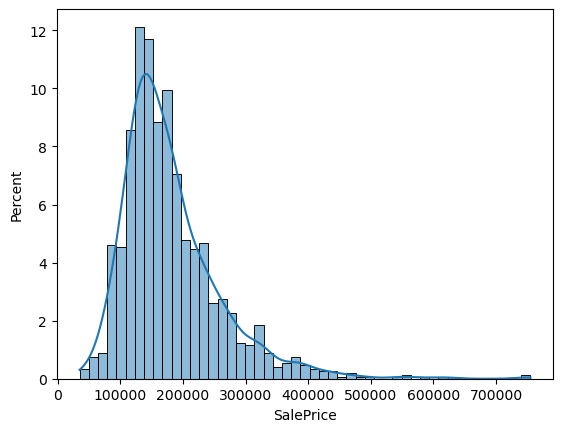

In [17]:
sns.histplot(outcome, stat='percent', kde=True)
plt.show()

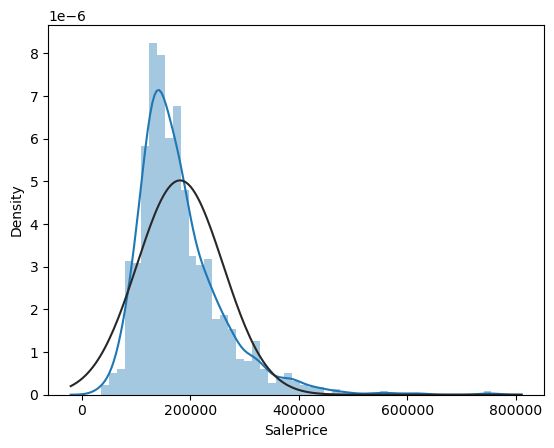

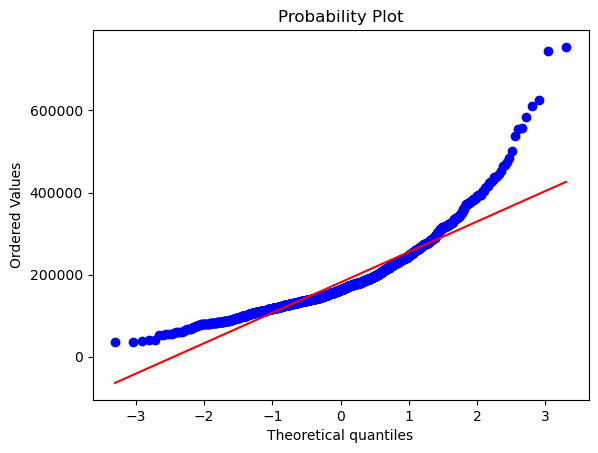

In [18]:
sns.distplot(outcome, fit=norm)
fig = plt.figure()
res = stats.probplot(outcome, plot=plt)
plt.show()

In [19]:
outcome.skew(), outcome.kurt()
# stats_outcome = stats.normaltest(outcome)
# stats_outcome.statistic, stats_outcome.pvalue
# not Normal

(1.8828757597682129, 6.536281860064529)

The statistics and visulization of the target variable evidently suggest that the outcome is not normally distributed. </br>
It is important for us to keep this in mind. When specifying models later, we may need to transform the outcome to approximate normal distribution. 

<div style="padding:10px;
            width: 100%;
            color:white;
            margin:10px;
            font-size:150%;
            text-align:left;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700;"> 
  Specification 2. Exploring covariates <br>
  <div style="margin-left: 30px;font-size:75%;">
    &#10148; How many covariates <br>
    &#10148; Distributions <br>
    &#10148; Missing values <br>
    &#10148; Potential outliers <br>
  </div>
</div>


In [36]:
print("Dimension of train data:", train.drop(columns='SalePrice', axis=1).shape)
print("Dimension of test data:",test.shape) 
# test data does not have outcome values

Dimension of train data: (1460, 79)
Dimension of test data: (1459, 79)


In [37]:
print("Columns in train dataset:")
print(train.columns)
print("-"*40)
print("Columns in test dataset:")
print(test.columns)

Columns in train dataset:
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond'

In [38]:
print("Types of columns in train dataset:")
print(train.dtypes)
print("-"*40)
print("Types of columns in test dataset:")
print(test.dtypes)

Types of columns in train dataset:
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object
----------------------------------------
Types of columns in test dataset:
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MiscVal            int64
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
Length: 79, dtype: object


In [39]:
for column in train.columns:
    if train.dtypes[column] == 'object':
        print(train[column].value_counts())
        print("-"*40)

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
----------------------------------------
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
----------------------------------------
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
----------------------------------------
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
----------------------------------------
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
----------------------------------------
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
----------------------------------------
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
----------------------------------------
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
----------------------------------------
Neighborhood
NAmes      2

In [40]:
train.describe()
# train.describe(include='all')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [41]:
n_miss = train.isnull().sum()
per_miss = n_miss/train.shape[0]
missing = pd.concat([n_miss, per_miss], axis=1, keys=['cnt_miss', 'pct_miss'])
missing[missing['cnt_miss']>0].sort_values(by='cnt_miss', ascending=False)
# print("Count of missing values:")
# for column in train.columns:
#     if train[column].isna().sum()>0:
#         print(f"'{column}':", train[column].isna().sum())


,cnt_miss,pct_miss
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax = ax.ravel()  # flatten 2D array to 1D for easy looping

features = ['YearBuilt', 'YearRemodAdd', 'OverallQual', 'OverallCond']
titles = ['Year Built', 'Year Remodeled', 'Overall Quality', 'Overall Condition']

for i in range(4):
    ax[i].scatter(train[features[i]], outcome)
    ax[i].set_title(f"Sale Price vs. {titles[i]}")
    ax[i].set_xlabel(titles[i])
    if i in (2,3):
        ax[i].set_xticks(np.arange(1, 11))
    ax[i].set_ylabel("Sale Price")

plt.tight_layout()
plt.show()

<div style="padding:10px;
            width: 100%;
            color:white;
            margin:10px;
            font-size:150%;
            text-align:left;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700;"> 
  Specification 3. Bivariate relationships of outcome with covariates <br>
</div>


In [42]:
object = train.select_dtypes('object').columns.to_list()
print(object)
numeric = train.select_dtypes(include=['int', 'float']).columns.to_list()
print(numeric)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'Enclos

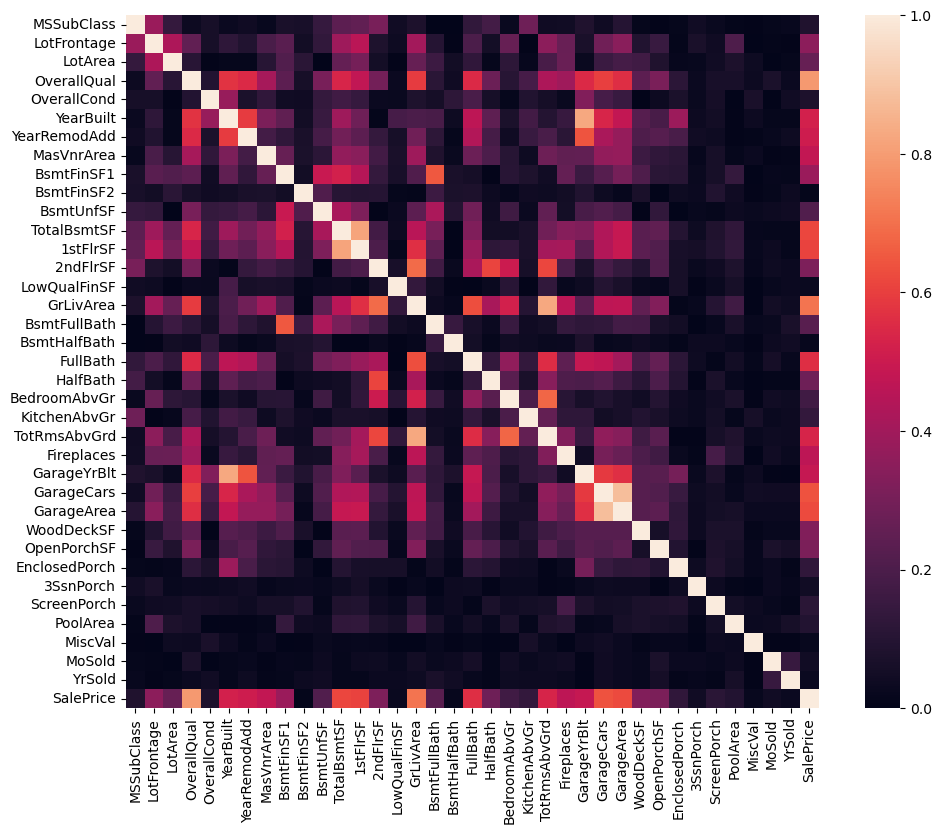

In [43]:
#correlation matrix
corrmat = train.corr(numeric_only=True)
abs_corrmat = np.abs(corrmat)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(abs_corrmat, vmin=0, vmax=1, square=True )
plt.show()
# OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, GarageCars, GarageArea

In [44]:
# abs_corrmat.loc[abs_corrmat['LogSalePrice']>=0.8, 'LogSalePrice']
abs_corrmat.sort_values(by='SalePrice', ascending=False)['SalePrice'].head(11)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

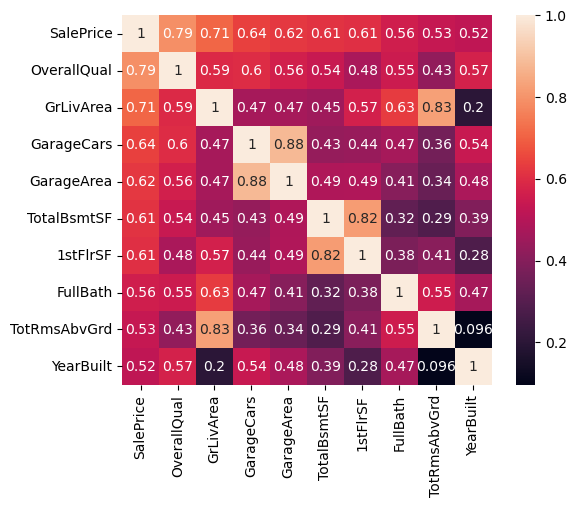

In [45]:
k = 10 
vars = abs_corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
top_corrmat = train[vars].corr()
sns.heatmap(top_corrmat, vmax=1, square=True,annot=True)
plt.show()


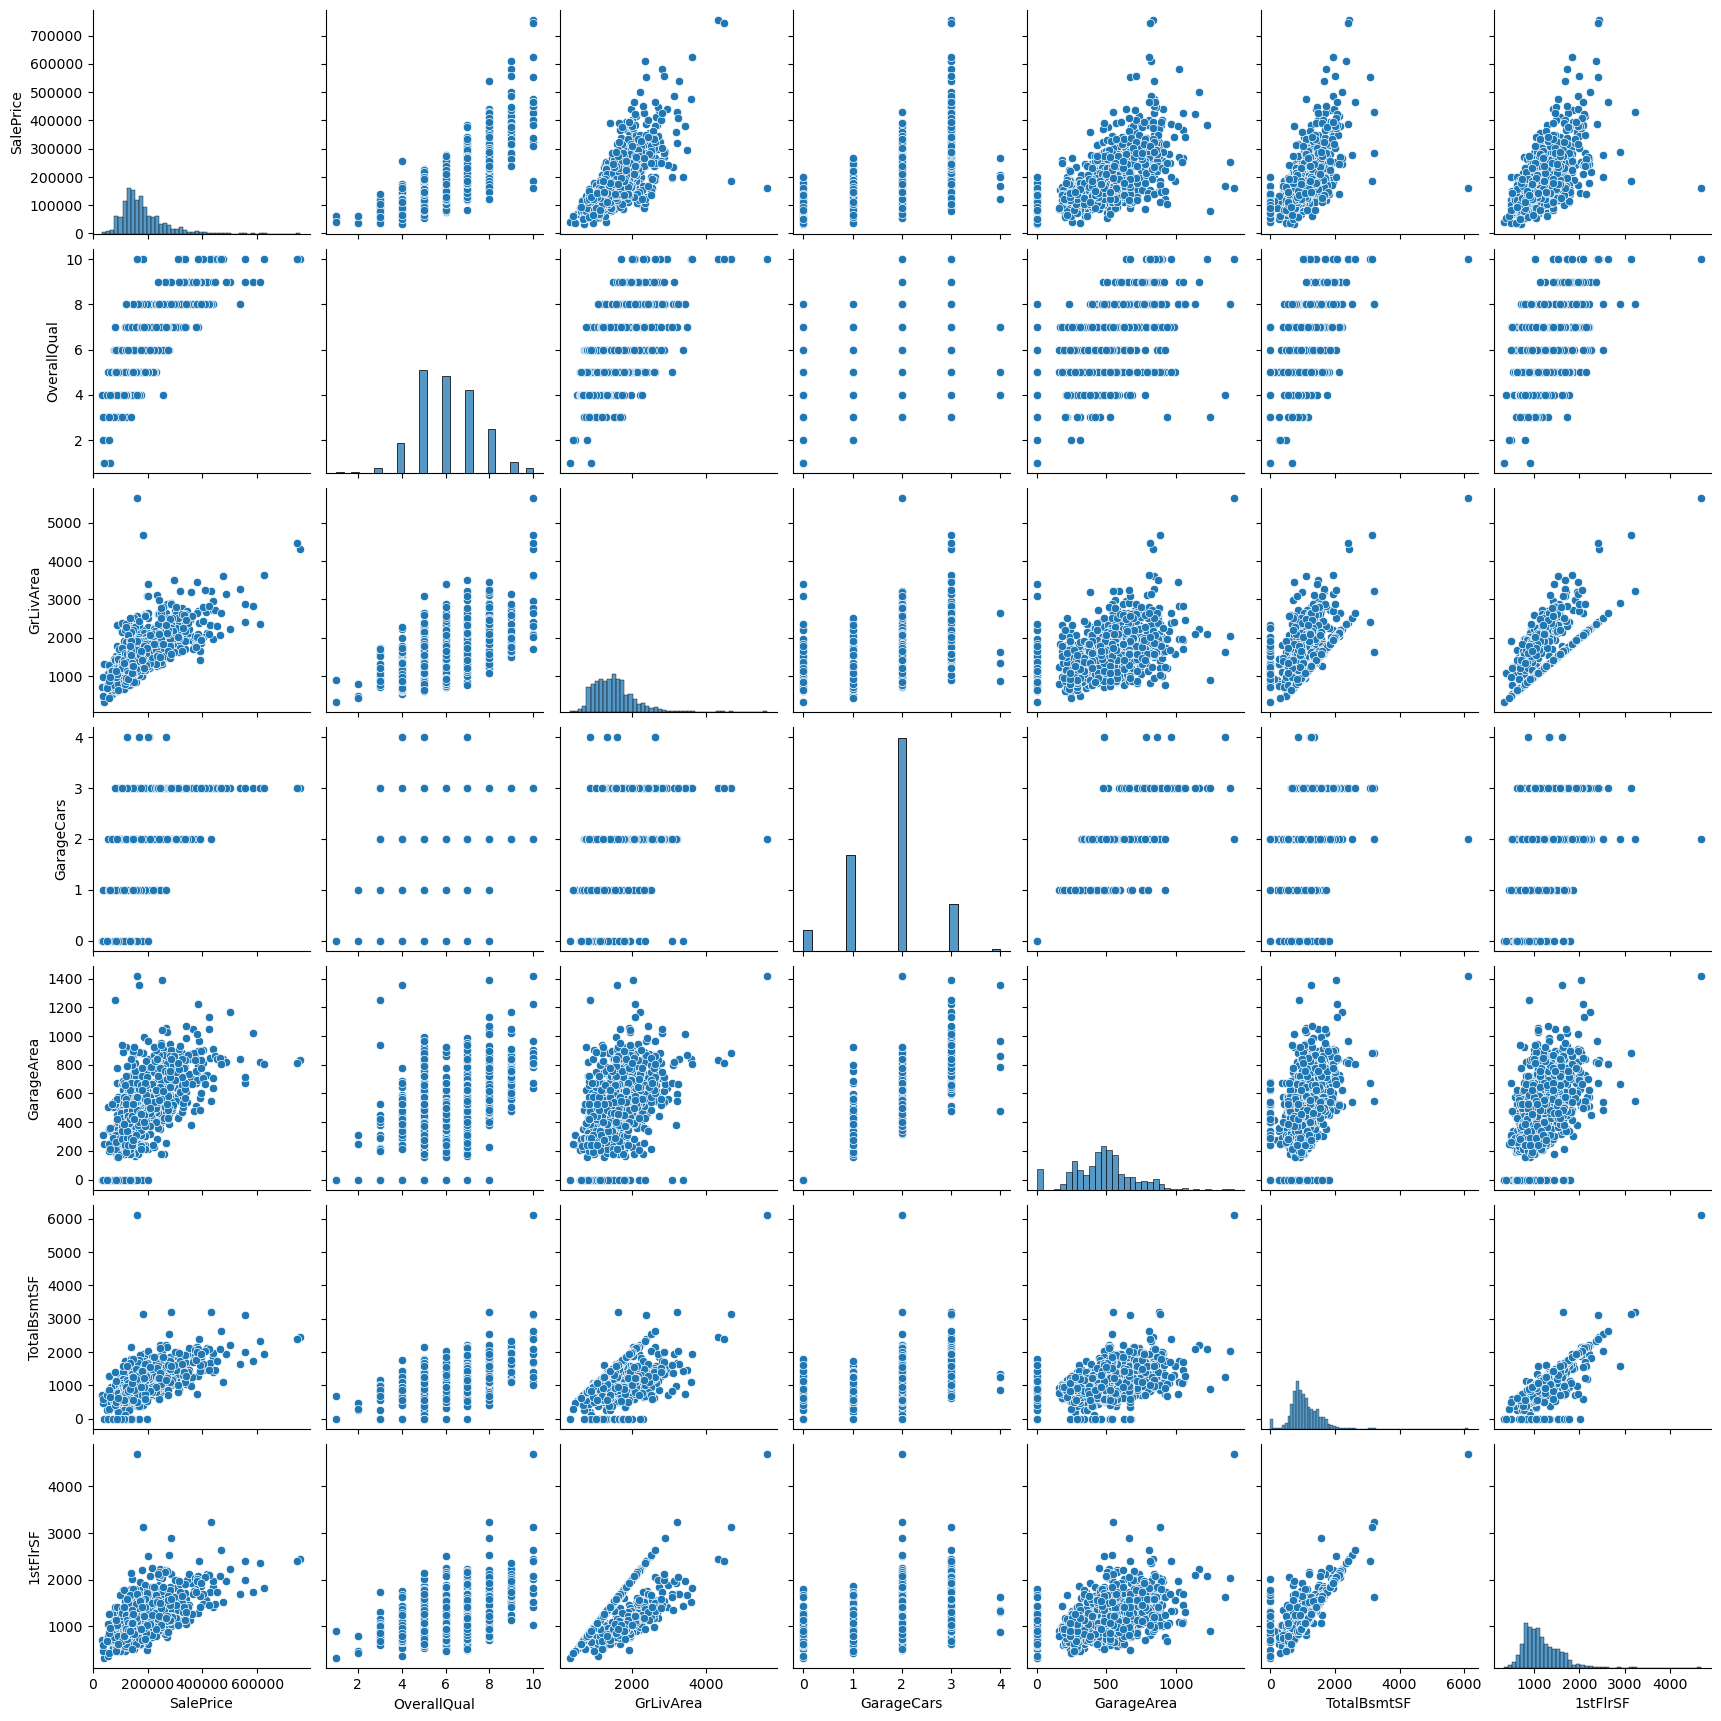

In [46]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
sns.pairplot(train[cols], size = 2.5)
plt.show();

<div style="padding:10px;
            width: 100%;
            color:white;
            margin:10px;
            font-size:150%;
            text-align:left;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700;"> 
  Specification 4. Data Cleaning and Preproscessing <br>
  <div style="margin-left: 30px;font-size:75%;">
    &#10148; Drop outliers <br>
    &#10148; Trasformation of outcome <br>
    &#10148; Adress missing data <br>
    &#10148; Feature selection <br>
  </div>
</div>

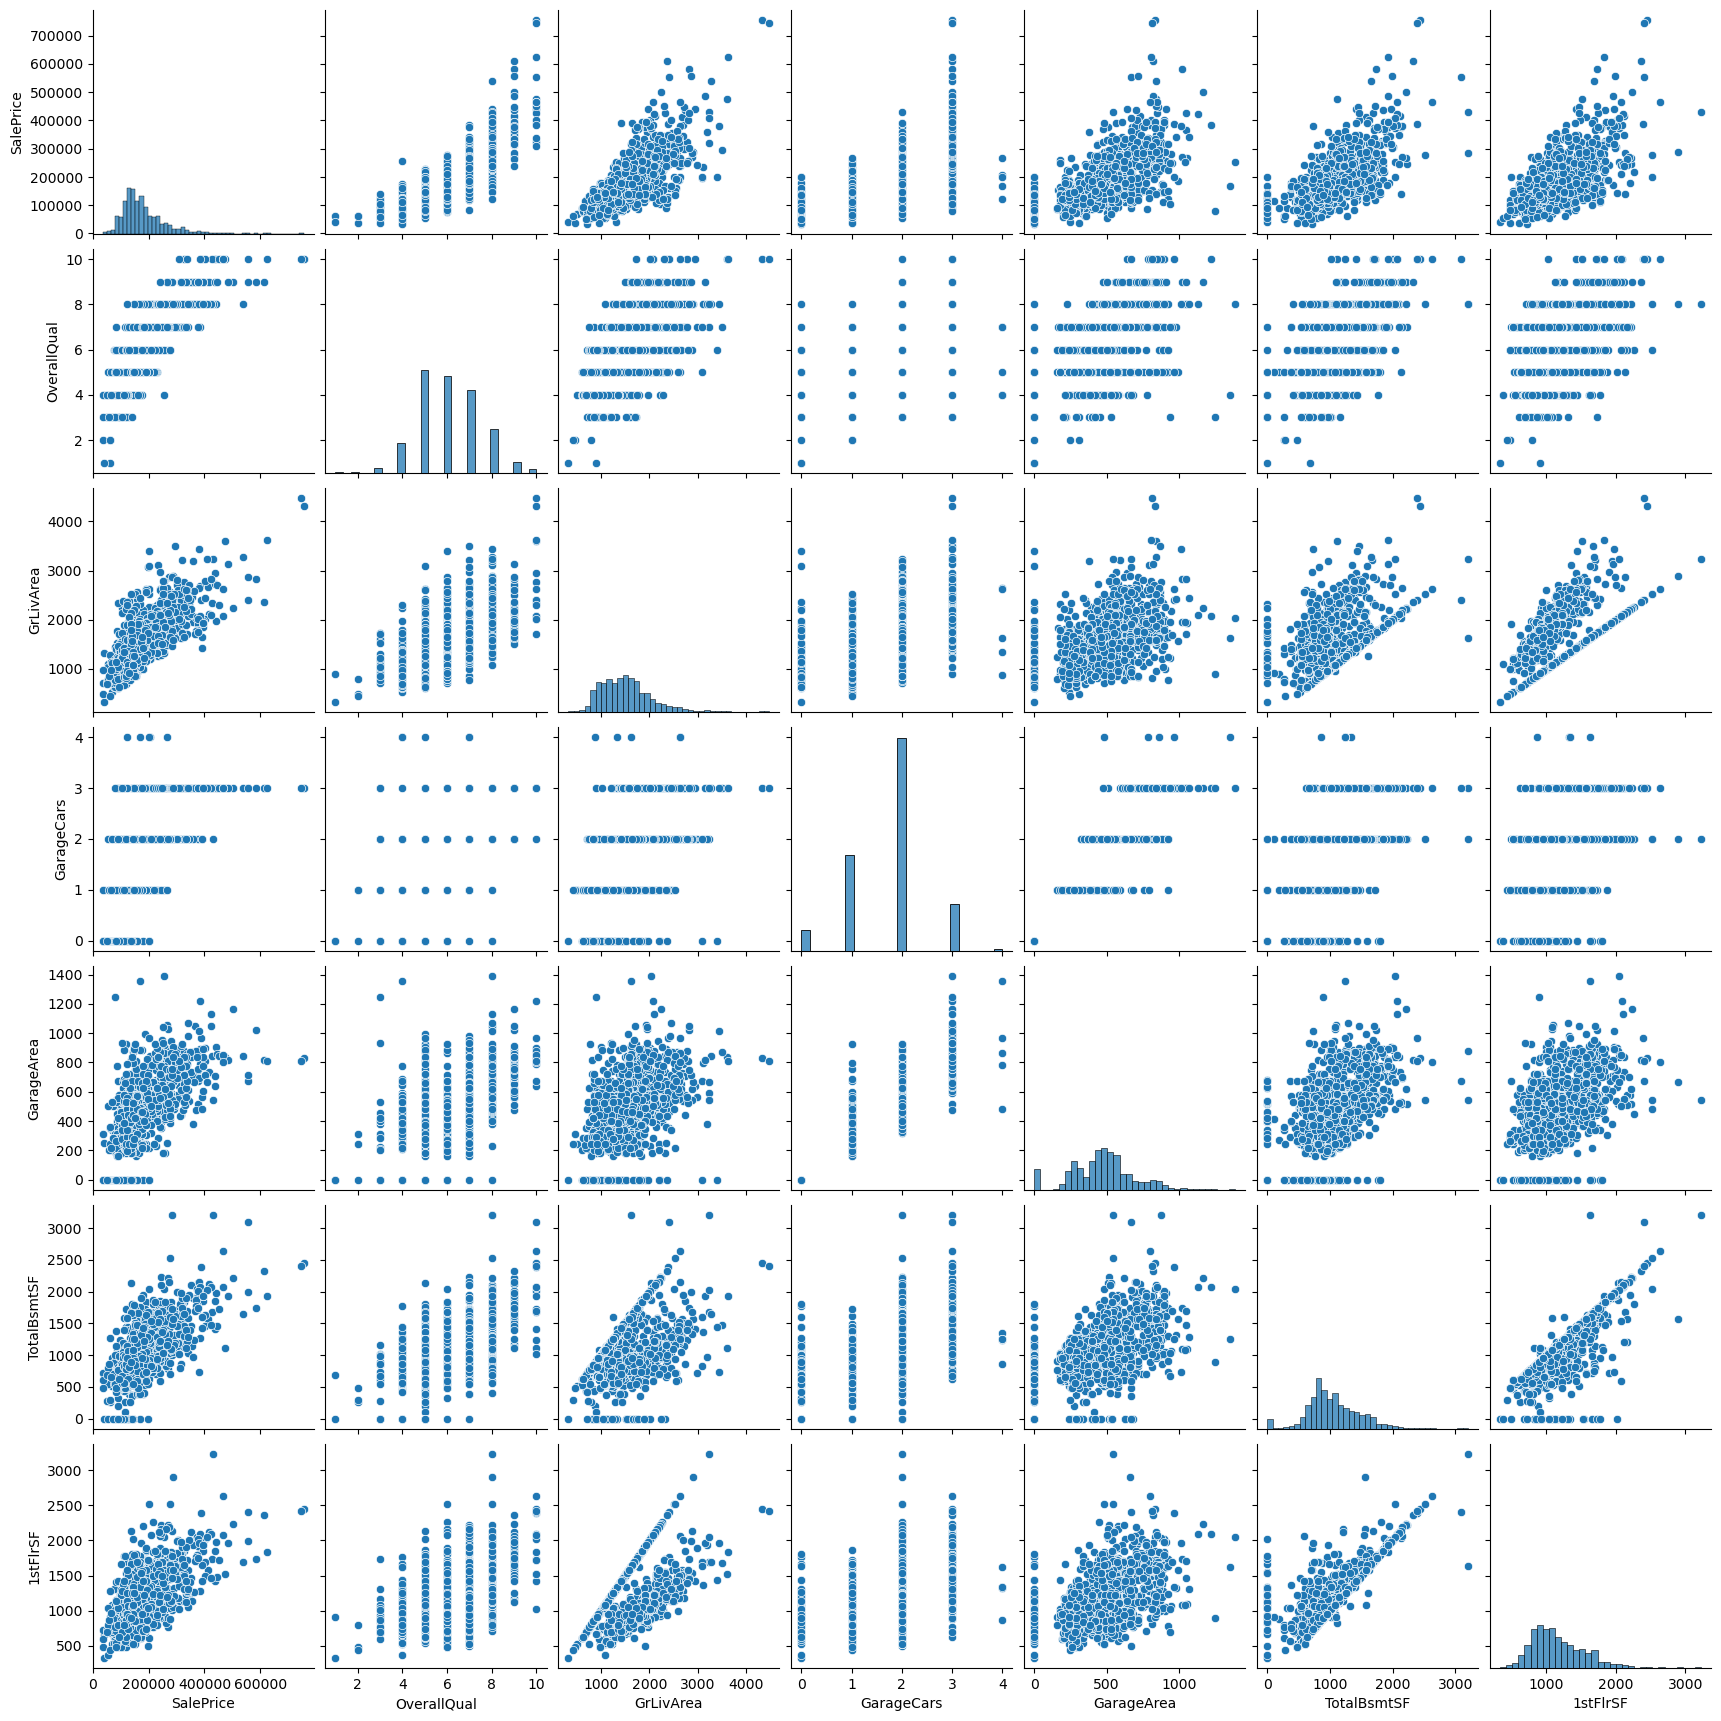

In [47]:
train = train.drop(
    train.loc[
        ((train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)) |
        ((train['TotalBsmtSF'] > 6000) & (train['SalePrice'] < 200000)) |
        ((train['1stFlrSF'] > 4000) & (train['SalePrice'] < 200000))
    ].index
)

sns.pairplot(train[cols], size = 2.5)
plt.show();

In [ ]:
len_train = train.shape[0]
len_train

1458

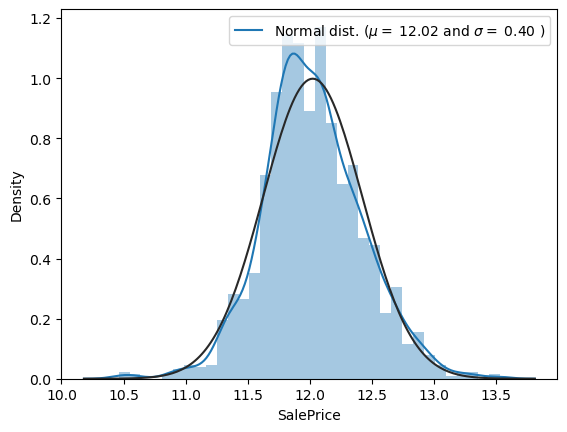

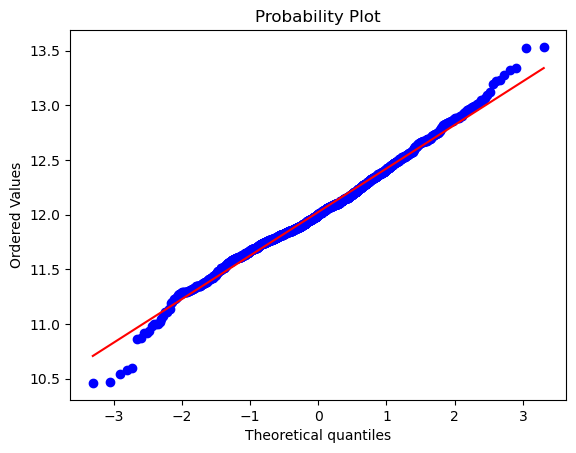

In [49]:
y_train = np.log1p(train['SalePrice'])
train.drop(columns='SalePrice', axis=1, inplace=True)
(mu, sigma) = norm.fit(y_train)

sns.distplot(y_train, fit=norm);
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)
plt.show() # almost normal

In [50]:
stats_outcome = stats.normaltest(y_train)
stats_outcome.statistic, stats_outcome.pvalue, y_train.skew(), y_train.kurt()

(25.299796953611242,
 3.2078857688570972e-06,
 0.12157976050304875,
 0.8047507917418972)

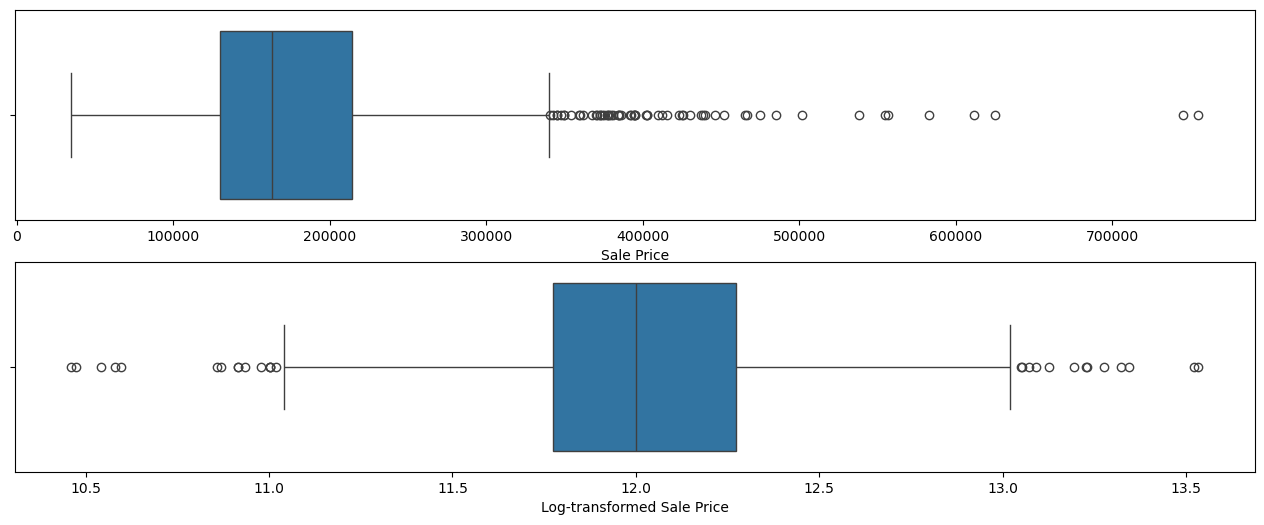

In [51]:
fig, ax = plt.subplots(2,1,figsize=(16,6))
sns.boxplot(x= outcome, y= None, orient='v', ax=ax[0])
ax[0].set_xlabel("Sale Price")
sns.boxplot(x= y_train, y= None, orient='v', ax=ax[1])
ax[1].set_xlabel("Log-transformed Sale Price")
plt.show()

In [ ]:
# Concate data before conducting imputation and generating dummies
all_data = pd.concat([train, test], axis=0)

In [54]:
# Impute data

all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")

all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")


In [ ]:
print("Count of missing values:")
for column in all_data.columns:
    if all_data[column].isna().sum()>0:
        print(f"'{column}':", all_data[column].isna().sum())
# No missingness 

Count of missing values:


In [56]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1',
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond',
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape
print('Shape all_data: {}'.format(all_data.shape))

# Adding total sqfootage feature
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']
all_data.drop(columns=['TotalBsmtSF','1stFlrSF','2ndFlrSF'], axis=1, inplace=True)

Shape all_data: (2917, 78)


In [57]:
numeric = all_data.select_dtypes(include=['int','float']).columns.to_list()
# Check the skew of all numerical features
skewed_feats = all_data[numeric].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
kurt_feats = all_data[numeric].apply(lambda x: kurtosis(x.dropna())).sort_values(ascending=False)
norm_test_df = pd.concat([skewed_feats,kurt_feats], axis=1, keys=['Skewness', 'Kurtosis'])
norm_test_df.head(20)

,Skewness,Kurtosis
MiscVal,21.939672,562.719739
PoolArea,17.688664,326.465649
LotArea,13.109495,275.165633
LowQualFinSF,12.084539,174.508689
3SsnPorch,11.372080,149.046731
LandSlope,4.973254,26.506521
KitchenAbvGr,4.300550,19.725332
BsmtFinSF2,4.144503,18.794367
EnclosedPorch,4.002344,28.307398
ScreenPorch,3.945101,17.729227


In [58]:
norm_test_df = norm_test_df[abs(norm_test_df['Skewness']) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(norm_test_df.shape[0]))

from scipy.special import boxcox1p
skewed_features = norm_test_df.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 34 skewed numerical features to Box Cox transform


In [59]:
all_data = pd.get_dummies(all_data)
all_data.shape

(2917, 217)

In [60]:
X_train = all_data[:len_train]
X_test = all_data[len_train:]
X_train.shape, X_test.shape

((1458, 217), (1459, 217))

<div style="padding:10px;
            width: 100%;
            color:white;
            margin:10px;
            font-size:150%;
            text-align:left;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700;"> 
  Specification 5. Basid Modeling <br>
  <div style="margin-left: 30px;font-size:75%;">
  </div>
</div>

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import root_mean_squared_error, mean_squared_error
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb


In [62]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [63]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10,
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468,
                             learning_rate=0.05, max_depth=3,
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [64]:
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})" .format(score.mean(), score.std()))

Lasso score: 0.1103 (0.0074)
ElasticNet score: 0.1103 (0.0074)
Kernel Ridge score: 0.1477 (0.0070)
Gradient Boosting score: 0.1168 (0.0082)
Xgboost score: 0.1175 (0.0067)
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging

<div style="padding:10px;
            width: 100%;
            color:white;
            margin:10px;
            font-size:150%;
            text-align:left;
            border-radius:5px;
            background-color:#294B8E;
            overflow:hidden;
            font-weight:700;"> 
  Specification 6. Stacking Models <br>
  <div style="margin-left: 30px;font-size:75%;">
    &#10148; Simplest approach: Average base models <br>
    &#10148; Less simple approach: Adding a Meta-model 
  </div>
</div>

In [65]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models

    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]

        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self

    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [66]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print("Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Averaged base models score: 0.1103 (0.0086)



In [73]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds

    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)

        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X.iloc[train_index], y.iloc[train_index])
                y_pred = instance.predict(X.iloc[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred

        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

    #Do the predictions of all base models on the test data and use the averaged predictions as
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [74]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1079 (0.0072)


In [75]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [77]:
stacked_averaged_models.fit(X_train, y_train)
stacked_train_pred = stacked_averaged_models.predict(X_train)
stacked_pred = np.expm1(stacked_averaged_models.predict(X_test))
print(rmsle(y_train, stacked_train_pred))

0.08015353137926931


In [78]:
model_xgb.fit(X_train, y_train)
xgb_train_pred = model_xgb.predict(X_train)
xgb_pred = np.expm1(model_xgb.predict(X_test))
print(rmsle(y_train, xgb_train_pred))

0.08749613265626326


In [79]:
model_lgb.fit(X_train, y_train)
lgb_train_pred = model_lgb.predict(X_train)
lgb_pred = np.expm1(model_lgb.predict(X_test))
print(rmsle(y_train, lgb_train_pred))

[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignor

In [80]:
'''RMSE on the entire Train data when averaging'''

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07826825128999926


In [81]:
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [82]:
submission = pd.DataFrame()
submission['Id'] = test.index
submission['SalePrice'] = ensemble
submission.to_csv('./submission.csv', index=False)